In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv('pis/Mushroom/agaricus-lepiota.data', header=None)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)
df.iloc[:5,:]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
#df.groupby(0)[1].count()
df.groupby(2)[0].value_counts().unstack().fillna(0).astype(int)

,e,p
2,,
f,1560,760
g,0,4
s,1144,1412
y,1504,1740


In [5]:
cnt = df[0].value_counts()
p0 = cnt['p']/cnt.sum()
z0 = np.log(p0) - np.log(1.0 - p0)
print(p0,z0)
cnt

0.48202855736090594 -0.07191675076714477


e    4208
p    3916
Name: 0, dtype: int64

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


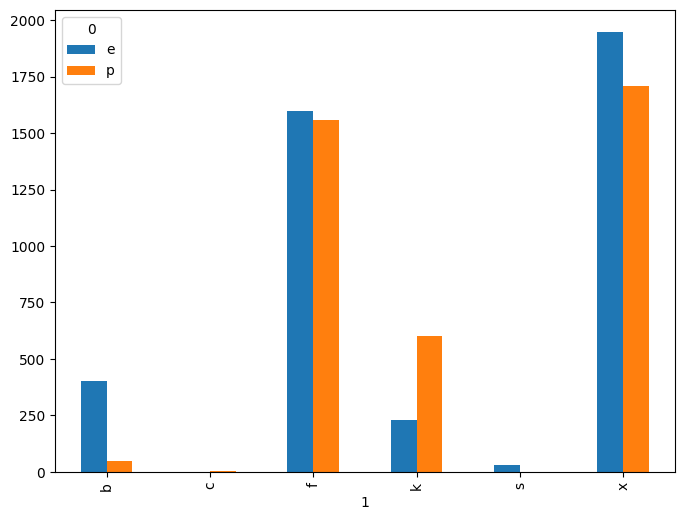

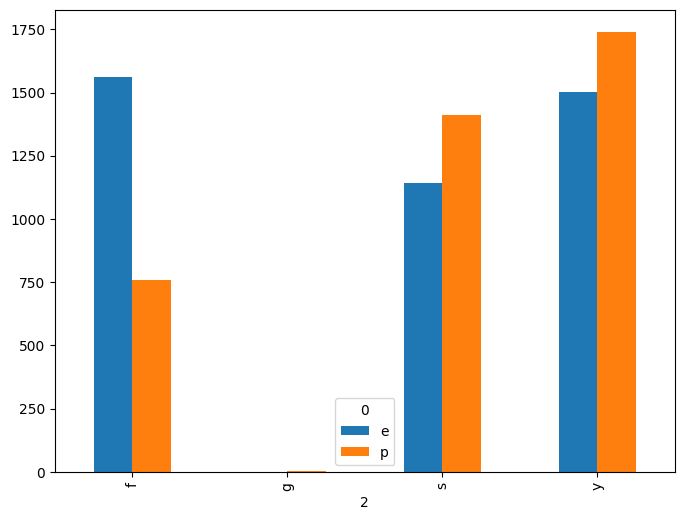

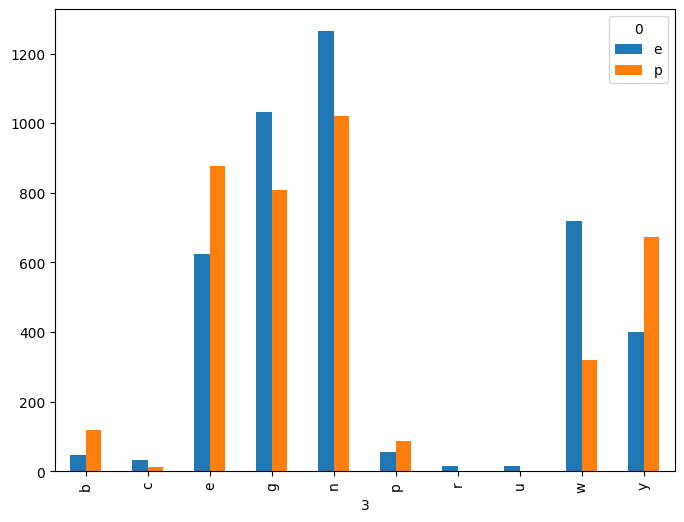

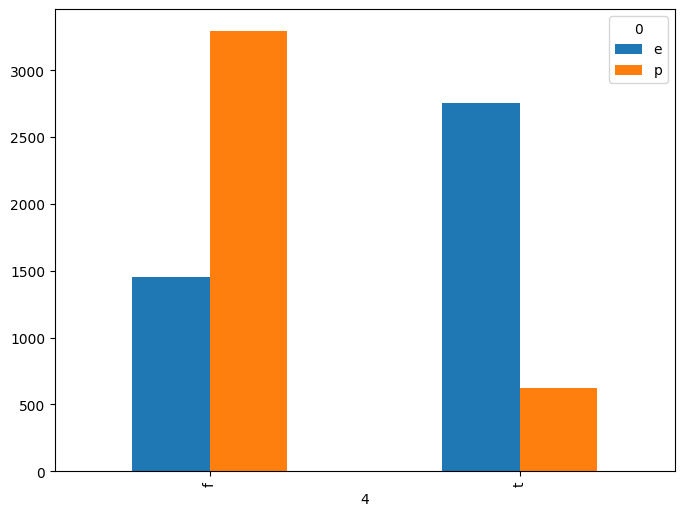

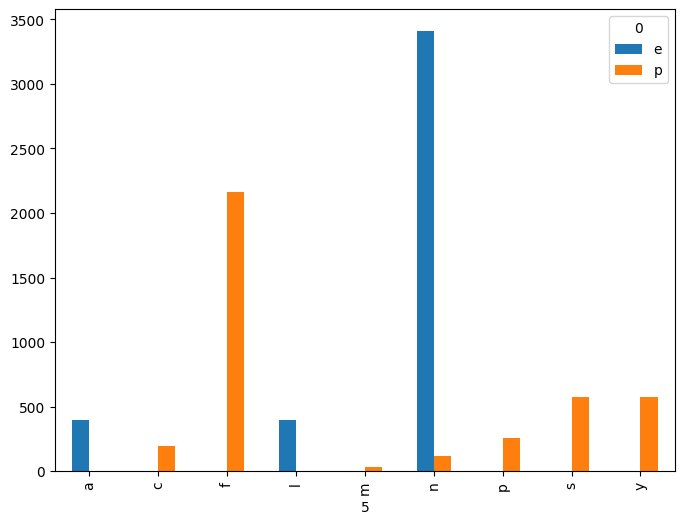

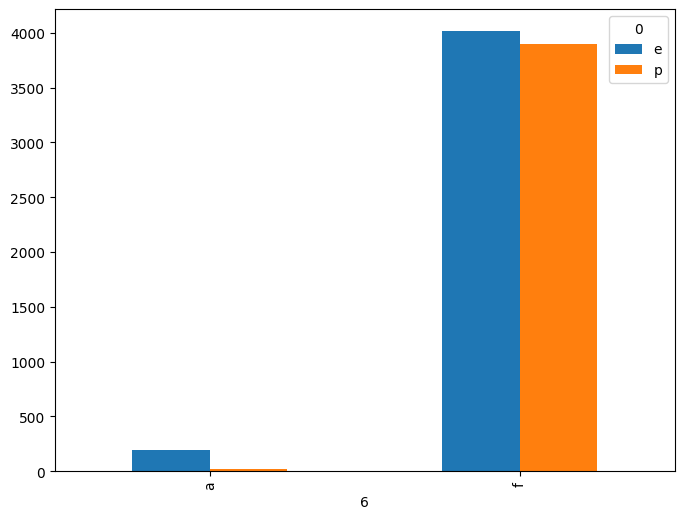

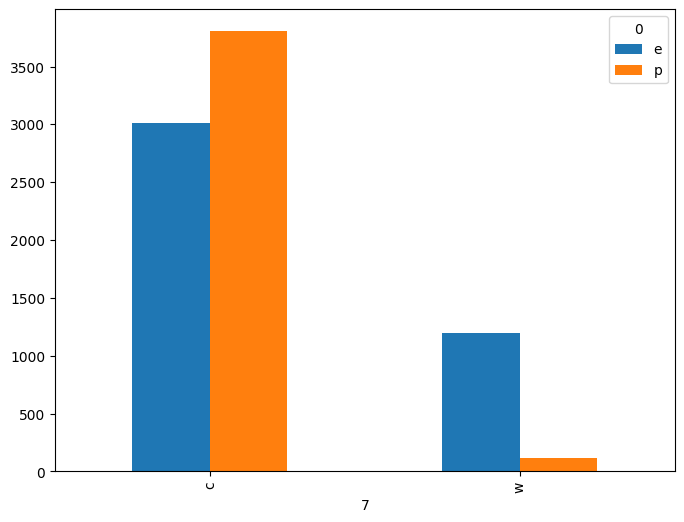

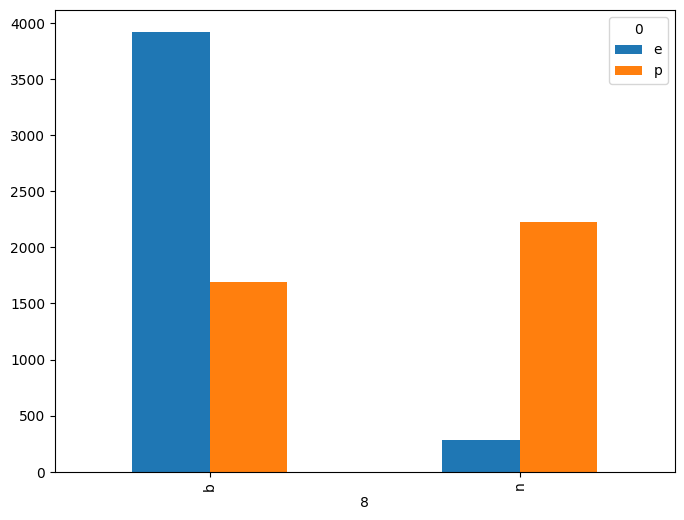

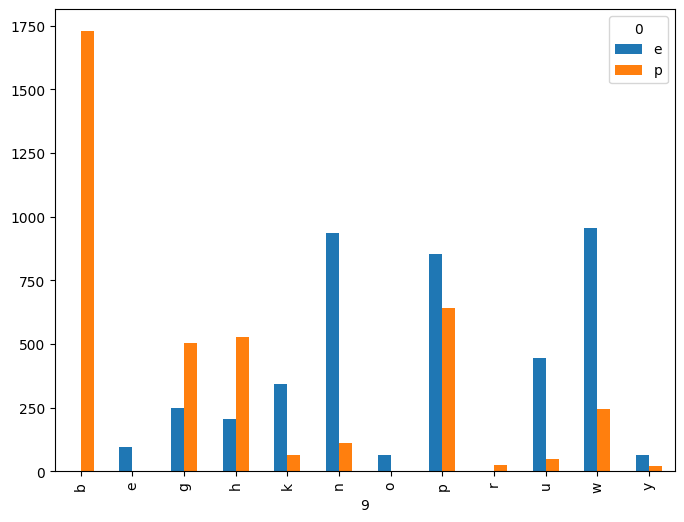

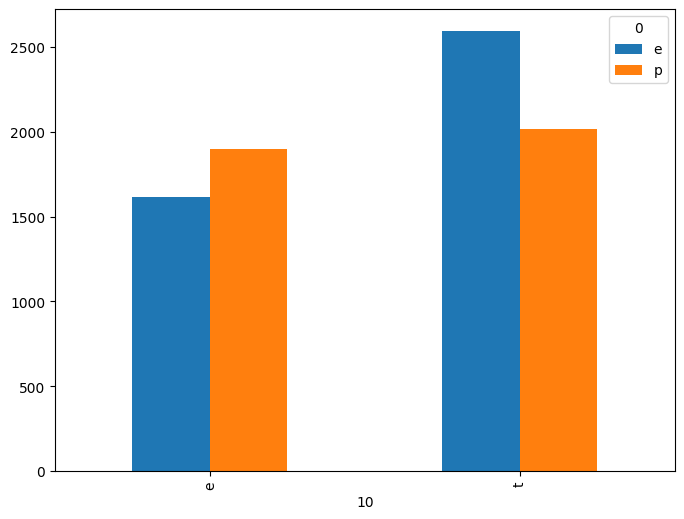

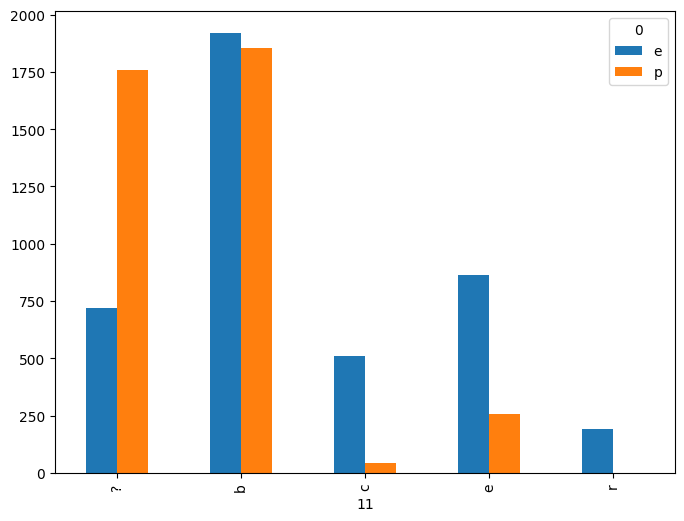

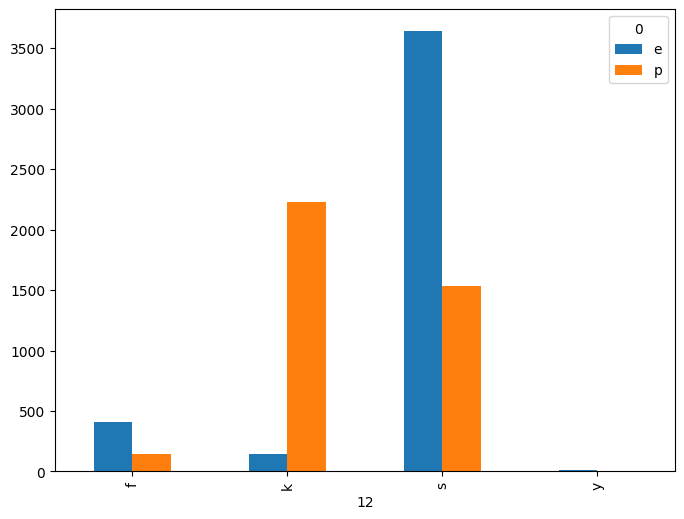

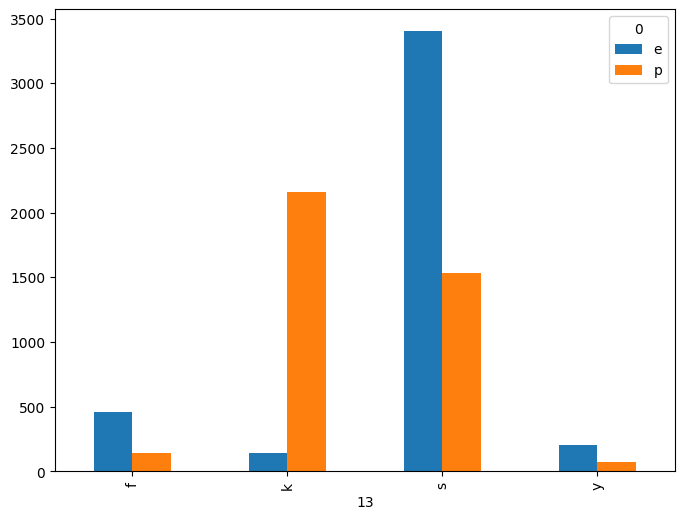

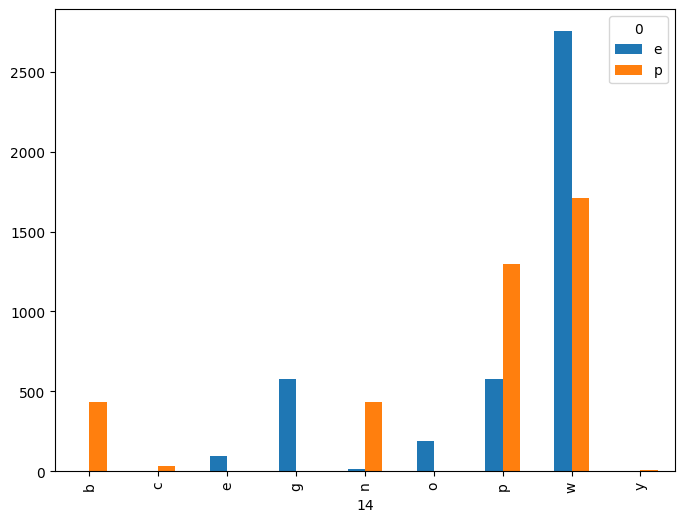

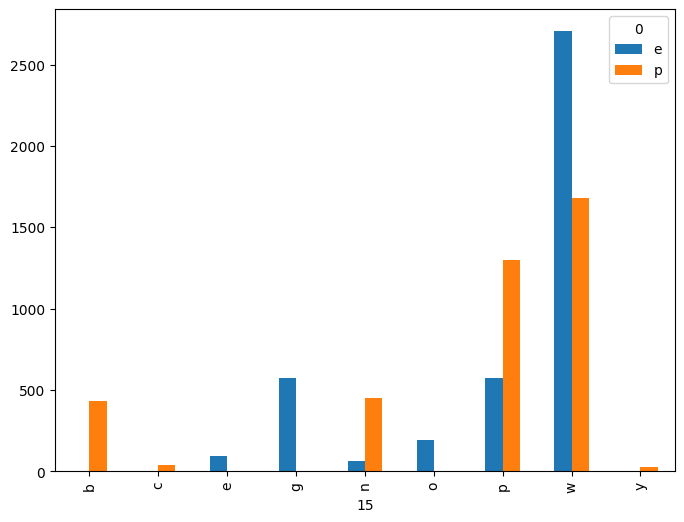

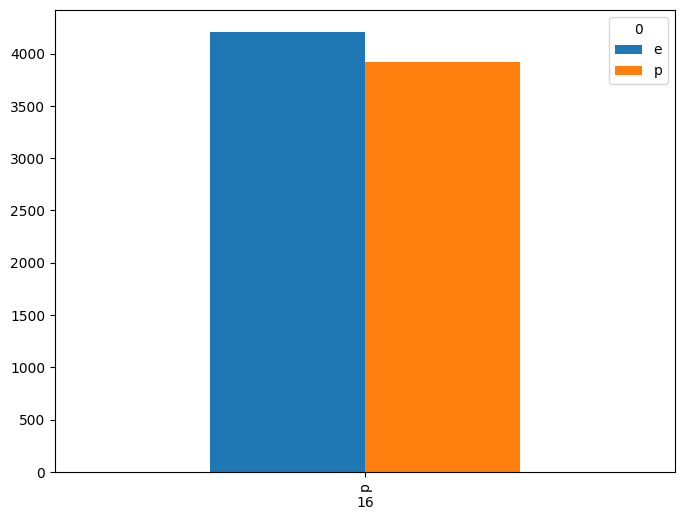

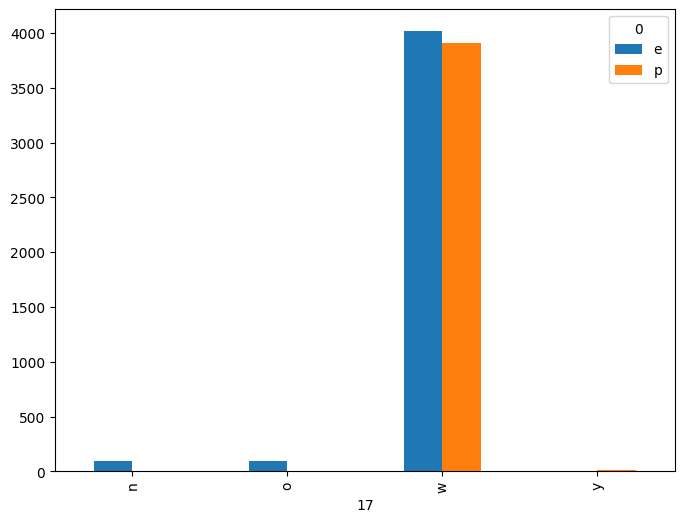

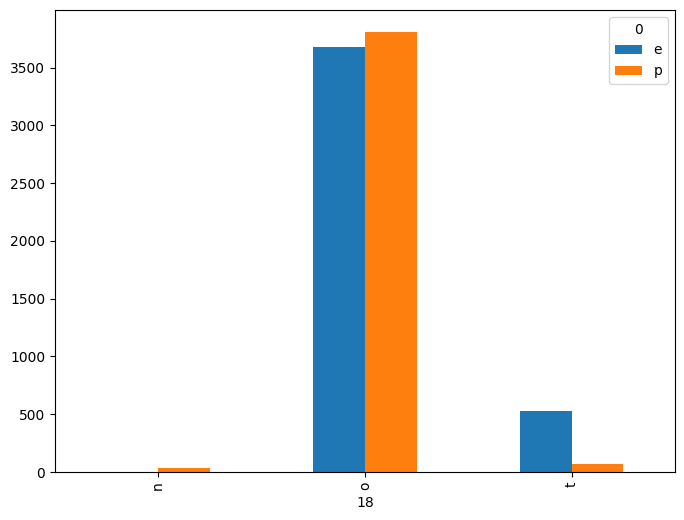

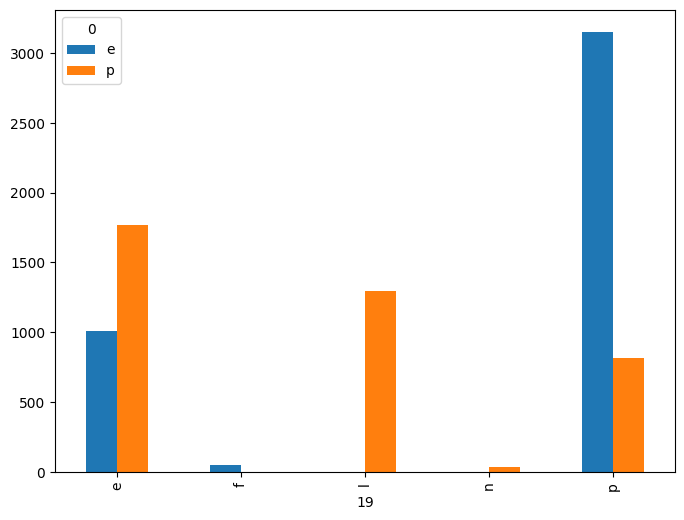

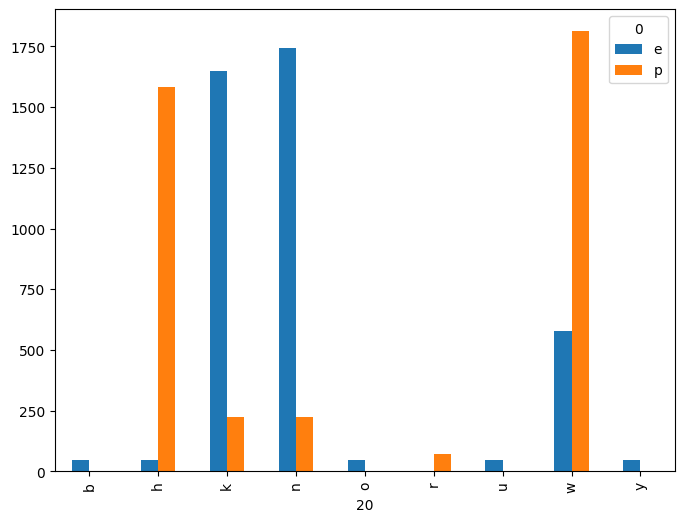

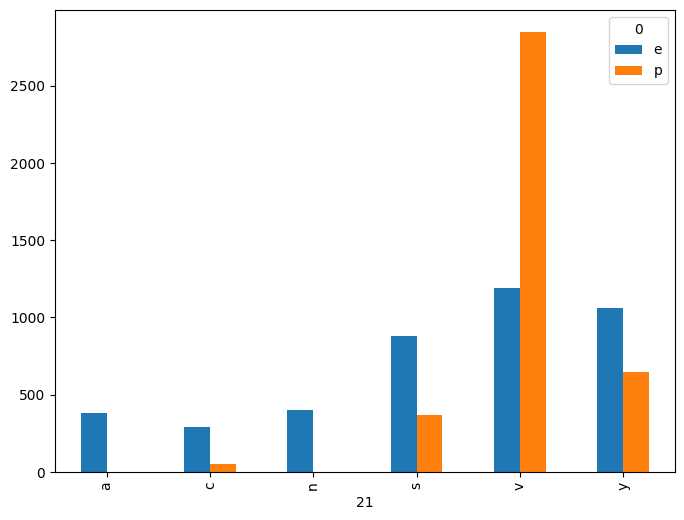

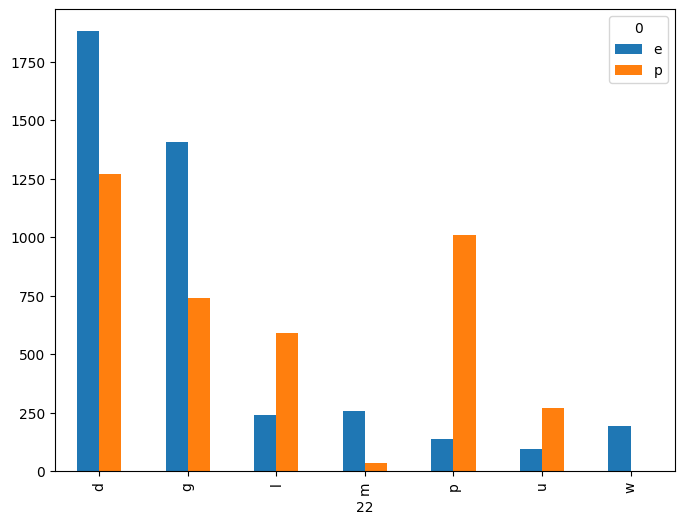

In [6]:
for i in range(1,23):
  df.groupby(i)[0].value_counts().unstack().fillna(0).plot.bar(figsize=(8,6))


In [7]:
funct = [0]
for i in range(1,23):
  f = df.groupby(i)[0].value_counts().unstack().fillna(0)
  f['prob'] = (f['p']+1)/(f['p']+f['e']+2)
  f['pred'] = f['prob'].map(lambda x: 'e' if x<0.5 else 'p')
  funct.append(f)

#funct[22]['pred']['d']

funct[5]

,e,p,prob,pred
5,,,,
a,400.0,0.0,0.002488,e
c,0.0,192.0,0.994845,p
f,0.0,2160.0,0.999537,p
l,400.0,0.0,0.002488,e
m,0.0,36.0,0.973684,p
n,3408.0,120.0,0.034278,e
p,0.0,256.0,0.996124,p
s,0.0,576.0,0.998270,p
y,0.0,576.0,0.998270,p


In [8]:
accuracy = [0]
for i in range(1,23):
  acc = 0
  for j in range(df.shape[0]):
    x = df[i][j]
    if (df[0][j] == funct[i]['pred'][x]):
      acc += 1
  accuracy.append(acc/df.shape[0])
accuracy

[0,
 0.5642540620384048,
 0.5805022156573116,
 0.5952732644017725,
 0.7439684884293452,
 0.9852289512555391,
 0.517971442639094,
 0.6159527326440177,
 0.7562776957163959,
 0.8050221565731167,
 0.5529295913343181,
 0.6459871984244214,
 0.7744953225012309,
 0.7661250615460364,
 0.7163958641063516,
 0.7144263909404235,
 0.517971442639094,
 0.5189561792220581,
 0.5381585425898572,
 0.7754800590841949,
 0.8680452978828164,
 0.7218119153126539,
 0.690300344657804]

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()


dfnew = pd.DataFrame(enc.fit_transform(df))

X = dfnew[5].to_numpy().reshape(-1, 1)
y = dfnew[0].to_numpy()



gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)
accuracyNB = sum(y_pred == y) / y.size
accuracyNB


0.9000492368291482

In [10]:

counts = df[0].value_counts()

def handmadeNB(X, n):
  Y = []
  for i in range(X.size):
    B = X[i]
    PB_A = funct[n]['p'][B] / sum(funct[n]['p'])
    PB = (funct[n]['p'][B] + funct[n]['e'][B]) / (sum(funct[n]['p']) + sum(funct[n]['e']))
    PA = counts['p'] / sum(counts)
    PA_B = PB_A * PA / PB

    if (PA_B > 0.5):
      Y.append('p')
    else:
      Y.append('e')
  return np.array(Y)

In [18]:
X_hm = df[5].to_numpy()
y_hm = df[0].to_numpy()

y_pred_hm = handmadeNB(X_hm, 5)
accuracyNB_hm = sum(y_pred_hm == y_hm) / y_hm.size
accuracyNB_hm


0.9852289512555391

In [12]:

from sklearn.linear_model import LogisticRegression
dfnew = pd.DataFrame(enc.fit_transform(df))

X = dfnew[5].to_numpy().reshape(-1, 1)
y = dfnew[0].to_numpy()

clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

array([0., 1.])

In [13]:
clf.predict_proba(X[:2, :])

array([[0.55937935, 0.44062065],
       [0.42588638, 0.57411362]])

In [14]:
clf.score(X, y)

0.7090103397341211

In [15]:
cnt = df[0].value_counts()
p0 = cnt['p']/cnt.sum()
z0 = np.log(p0) - np.log(1.0 - p0)
print(p0,z0)

0.48202855736090594 -0.07191675076714477


In [16]:
dfnew = df.copy()
rows_names = []

for i in df.columns[1:]:
  f = df.groupby(i)[0].value_counts().unstack().fillna(0)
  f['prob'] = (f['p']+1)/(f['p']+f['e']+2)
  P = df[i].map(lambda x: f.at[x,'prob'])
  rows_names.append('inv_sig_%s'%i)
  dfnew['inv_sig_%s'%i] = np.log(P) - np.log(1.0 - P) - z0

s = []

for i, row in dfnew.iterrows():
    c = row[rows_names].fillna(0).sum()
    t = 1/(1+np.exp(-row[rows_names].sum()))
    s.append(t)
dfnew['sum'] = s


In [17]:
dfnew

,0,1,2,3,4,5,6,7,8,9,...,inv_sig_14,inv_sig_15,inv_sig_16,inv_sig_17,inv_sig_18,inv_sig_19,inv_sig_20,inv_sig_21,inv_sig_22,sum
0,p,x,s,n,t,p,f,c,n,k,...,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.919907,-0.798344,1.106678,3.075820e-01
1,e,x,s,y,t,a,f,c,b,k,...,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.976493,-5.922045,-0.570718,1.560283e-10
2,e,b,s,w,t,l,f,c,b,n,...,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.976493,-5.922045,-1.866241,1.000735e-12
3,p,x,y,w,t,p,f,c,n,n,...,-0.402528,-0.403796,0.000018,0.044663,0.106099,-1.278554,-1.919907,-0.798344,1.106678,1.281810e-01
4,e,x,s,g,f,n,f,w,b,k,...,-0.402528,-0.403796,0.000018,0.044663,0.106099,0.633371,-1.976493,-5.881327,-0.570718,1.212328e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,-1.624218,0.972314,6.760823e-12
8120,e,x,s,n,f,n,a,c,b,y,...,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,0.942414,0.972314,2.941473e-11
8121,e,f,s,n,f,n,a,c,b,n,...,-5.190773,-5.190773,0.000018,-4.502794,0.106099,-1.278554,-3.819904,-1.624218,0.972314,8.559900e-13
8122,p,k,y,n,f,y,f,c,n,b,...,-0.402528,-0.403796,0.000018,0.044663,0.106099,0.633371,1.216813,0.942414,0.972314,1.000000e+00
